# Analysis of tblXDiagResults

This notebook contains codes and functions to run queries to analyze and understand the data present in the table `tblXDiagResults` of the xspoc database.

In [49]:
"""
For setting up local imports in an Ipython Shell
This is a workaround for ipython, dont need it for basic python scripts
"""
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [50]:
import pandas as pd
import numpy as np
import struct
import matplotlib.pyplot as plt

# Project Library
from library.dbconnection import PostgresRDS

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

## Queries

Uee the `run_query` functions to run queries. Check `Analysis.md` for some examples.

In [16]:
"""
Get a list of tables in the database being checked
"""
database = "oasis-data"

query1 = """
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'xspoc_dbo'
ORDER BY table_name
"""

with PostgresRDS(db=database) as engine:
    tables = pd.read_sql(query1, engine)

Connected to oasis-data DataBase
Connection Closed


array([['tblCardData'],
       ['tblCasings'],
       ['tblCasingSizes'],
       ['tblDeviations'],
       ['tblIPRAnalysisResults'],
       ['tblParameters'],
       ['tblParamStandardTypes'],
       ['tblPerforations'],
       ['tblPOCTypeActions'],
       ['tblPOCTypes'],
       ['tblProductionStatistics'],
       ['tblPUData'],
       ['tblPumpingUnits'],
       ['tblRodGrades'],
       ['tblRodGuides'],
       ['tblRodMaterials'],
       ['tblRods'],
       ['tblRodSizeGroups'],
       ['tblRodSizes'],
       ['tblSAMPumpingUnits'],
       ['tblSavedParameters'],
       ['tblSetpointGroups'],
       ['tblSetpointOptimization'],
       ['tblSetpointOptimizationAdvisories'],
       ['tblStates'],
       ['tblTubings'],
       ['tblTubingSizes'],
       ['tblWellDetails'],
       ['tblWellFailureCodes'],
       ['tblWellTest'],
       ['tblWellTests'],
       ['tblWVRods'],
       ['tblXDiagFlags'],
       ['tblXDiagResults'],
       ['tblXDiagResultsLast'],
       ['tblXDiagRodResul

In [47]:
list(set(table_names).difference(set(tables_wo_node)))

{'tblCasings',
 'tblDeviations',
 'tblIPRAnalysisResults',
 'tblPerforations',
 'tblProductionStatistics',
 'tblRods',
 'tblSavedParameters',
 'tblTubings',
 'tblWellDetails',
 'tblWellTest',
 'tblWellTests',
 'tblXDiagFlags',
 'tblXDiagResults',
 'tblXDiagResultsLast',
 'tblXDiagRodResults',
 'tblXDiagScores'}

In [39]:
tables_wo_node = [
    'tblCasingSizes',
    'tblPOCTypeActions',
    'tblPOCTypes',
    'tblPUData',
    'tblParamStandardTypes',
    'tblParameters',
    'tblPumpingUnits',
    'tblRodGrades',
    'tblRodGuides',
    'tblRodMaterials',
    'tblRodSizeGroups',
    'tblRodSizes',
    'tblSAMPumpingUnits',
    'tblSetpointGroups',
    'tblSetpointOptimization',
    'tblSetpointOptimizationAdvisories',
    'tblStates',
    'tblTubingSizes',
    'tblWVRods',
    'tblWellFailureCodes',
]

for i in tables_wo_node:
    print(i)

tblCasingSizes
tblPOCTypeActions
tblPOCTypes
tblPUData
tblParamStandardTypes
tblParameters
tblPumpingUnits
tblRodGrades
tblRodGuides
tblRodMaterials
tblRodSizeGroups
tblRodSizes
tblSAMPumpingUnits
tblSetpointGroups
tblSetpointOptimization
tblSetpointOptimizationAdvisories
tblStates
tblTubingSizes
tblWVRods
tblWellFailureCodes


In [32]:
table_names = tables.loc[tables.table_name != 'tblCardData', 'table_name'].to_list()

# for i in table_names:
#     print(i)
well_list = [
    'ACADIA 31-25H',
    'Zutz 44-12T',
    'A. JOHNSON 12-1H'
]

query = """
SELECT * FROM xspoc_dbo."{}"
WHERE "NodeID" in {}
ORDER BY "NodeID";
""".format(table_names[0], tuple(well_list))



'\nSELECT * FROM xspoc_dbo."tblCasings"\nWHERE "NodeID" in (\'ACADIA 31-25H\', \'Zutz 44-12T\', \'A. JOHNSON 12-1H\')\nORDER BY "NodeID";\n'

In [38]:
for i in table_names:
    print(i[3:])

Casings
CasingSizes
Deviations
IPRAnalysisResults
Parameters
ParamStandardTypes
Perforations
POCTypeActions
POCTypes
ProductionStatistics
PUData
PumpingUnits
RodGrades
RodGuides
RodMaterials
Rods
RodSizeGroups
RodSizes
SAMPumpingUnits
SavedParameters
SetpointGroups
SetpointOptimization
SetpointOptimizationAdvisories
States
Tubings
TubingSizes
WellDetails
WellFailureCodes
WellTest
WellTests
WVRods
XDiagFlags
XDiagResults
XDiagResultsLast
XDiagRodResults
XDiagScores


In [34]:
with PostgresRDS(db=database) as engine:
    test = pd.read_sql(query, engine)

Connected to oasis-data DataBase
Connection Closed


In [37]:
table_names[8][3:]

'POCTypes'

In [31]:
well_query = """
SELECT DISTINCT("NodeID")
FROM xspoc_dbo."tblXDiagResults"
ORDER BY "NodeID"
"""

well_query

'\nSELECT DISTINCT("NodeID")\nFROM xspoc_dbo."tblXDiagResults"\nORDER BY "NodeID"\n'

In [3]:
# Setup

well_reqd = [
    'Bonner 9-12H',
    'Bonner 9X-12HA',
    'Bonner 9X-12HB',
    'Cade 12-19HA',
    'Cade 12-19HB',
    'Cade 12X-19H',
    'Cook 12-13 6B',
    'Cook 12-13 7T',
    'Cook 12-13 9T',
    'Cook 41-12 11T',
    'Hanover Federal 5300 41-11 10B',
    'Hanover Federal 5300 41-11 11T',
    'Hanover Federal 5300 41-11 12B',
    'Hanover Federal 5300 41-11 13TX',
    'Helling Trust 43-22 10T',
    'Helling Trust 43-22 16T3',
    'Helling Trust 43-22 4B',
    'Helling Trust 44-22 5B',
    'Helling Trust 44-22 6B',
    'Helling Trust 44-22 7B',
    'Johnsrud 5198 14-18 11T',
    'Johnsrud 5198 14-18 13T',
    'Johnsrud 5198 14-18 15TX'
]

In [51]:
%%time
# Some Exploratory Queries

cols_query = """
SELECT attname            AS col
     , atttypid::regtype  AS datatype
       -- more attributes?
FROM   pg_attribute
WHERE  attrelid = 'xspoc_dbo."tblXDiagResults"'::regclass  -- table name, optionally schema-qualified
AND    attnum > 0
AND    NOT attisdropped
ORDER  BY attnum;
"""

well_query = """
SELECT DISTINCT("NodeID")
FROM xspoc_dbo."tblXDiagResults"
ORDER BY "NodeID"
"""

with PostgresRDS(db='oasis-data') as engine:
#     col_list_full = pd.read_sql(cols_query, engine)  # Profiling: 1s 680ms -- Will be longer in jupyter
    well_list_fill = pd.read_sql(well_query, engine)  # Profiling: 1m 10s -- Longer in jupyter

Connected to oasis-data DataBase
Connection Closed
Wall time: 1min 5s


In [84]:
print("List of Columns")
display(col_list_full)

print('\nList of wells')
display(well_list_fill)

List of Columns


,col,datatype
0,NodeID,character varying
1,Date,timestamp without time zone
2,PumpCond1,character varying
3,PumpCond2,character varying
4,FillagePct,smallint
5,NetProd,smallint
6,FluidLevelXDiag,integer
7,ElecCostPerBO,numeric
8,ElecCostMinTorquePerBO,numeric
9,ElectCostMinEnergyPerBO,numeric



List of wells


,NodeID
0,Aagvik 1-35H
1,ACADIA 31-25H
2,Acklins 12-18H
3,Aerabelle 5502 43-7T
4,A. JOHNSON 12-1H
...,...
864,YEISER 5603 42-33H
865,Yukon 41-12T
866,Zaye Federal 34-2H
867,Zdenek 6093 42-24H


In [ ]:
well_not_present = [
    'Berry 5493 44-7 14BX',
    'Berry 5493 44-7 15TX',
    'Oasis Meiers 5692 11-19 9BX',
    'Oasis Meiers 5692 11-19 10T',
    'Oasis Meiers 5692 11-19 11T',
    'Spratley 5494 14-13 14B',
    'Spratley 5494 14-13 16BX'
]

In [60]:
well_list_1 = [
    'Bonner 9-12H',
    'Bonner 9X-12HA',
    'Bonner 9X-12HB',
    'Cade 12-19HA',
    'Cade 12-19HB',
    'Cade 12X-19H',
    'Cook 12-13 6B',
    'Cook 12-13 7T',
    'Cook 12-13 9T',
    'Cook 41-12 11T',
    'Hanover Federal 5300 41-11 10B',
    'Hanover Federal 5300 41-11 11T',
    'Hanover Federal 5300 41-11 12B',
    'Hanover Federal 5300 41-11 13TX',
    'Helling Trust 43-22 10T',
    'Helling Trust 43-22 16T3',
    'Helling Trust 43-22 4B',
    'Helling Trust 44-22 5B',
    'Helling Trust 44-22 6B',
    'Helling Trust 44-22 7B',
    'Johnsrud 5198 14-18 11T',
    'Johnsrud 5198 14-18 13T',
    'Johnsrud 5198 14-18 15TX',
    'Lite 5393 31-11 9B',
    'Lite 5393 41-11 11B',
    'Lite 5393 41-11 12T',
    'Rolfson N 5198 12-17 5T',
    'Rolfson N 5198 12-17 7T',
    'Rolfson S 5198 11-29 2TX',
    'Rolfson S 5198 11-29 4T',
    'Rolfson S 5198 12-29 6T',
    'Rolfson S 5198 12-29 8T',
    'Rolfson S 5198 14-29 11T',
    'Rolfson S 5198 14-29 13T',
    'Stenehjem 14-9H',
    'Spratley 5494 14-13 12B',
    'Spratley 5494 14-13 13T',
    'Spratley 5494 14-13 15T',
    'Stenehjem 14X-9HA',
    'Stenehjem 14X-9HB',
    'Stenehjem 15-9HA',
    'Stenehjem 15-9HB',
    'Stenehjem 15X-9H'
]

In [59]:

# Find Specific Wells
well_list_fill[well_list_fill.NodeID.str.contains("Oasis")]

,NodeID


In [71]:
set(well_list_1).issubset(all_wells)

True

In [69]:
all_wells = well_list_fill['NodeID'].to_list()

## Well Specific

In [4]:
# Add columns within the query itself
well_name = 'Cook 12-13 7T'

# With all columns
query = """
SELECT * FROM xspoc_dbo."tblXDiagResults"
WHERE "NodeID" = '{}'
ORDER BY "Date"
""".format(well_name)

# # With Specific columns
# query = """
# SELECT
# "NodeID", "Date", "FillagePct", "MotorLoad", 
# "TubingPressure", "CasingPressure", "Friction",
# "TubingLeak", "FluidLevelXDiag"
# FROM xspoc_dbo."tblXDiagResults"
# WHERE "NodeID" = '{}'
# ORDER BY "NodeID", "Date"
# """.format(well_name)

with PostgresRDS(db='oasis-data') as engine:
    data = pd.read_sql(query, engine)

display(data.head())

Connected to oasis-data DataBase
Connection Closed


,NodeID,Date,PumpCond1,PumpCond2,FillagePct,NetProd,FluidLevelXDiag,ElecCostPerBO,ElecCostMinTorquePerBO,ElectCostMinEnergyPerBO,PumpEffPct,SystemEffPct,PumpStroke,GearBoxLoadPct,MinTorqueGBLoadPct,MinEnergyGBLoadPct,BalanceUnit,TubingPressure,CasingPressure,GrossProd,WaterCutPct,MinHP,PeakGBTorque,MinGBTorque,MinEnerGBTorque,MonthlyElecCost,MinMonthlyElecCost,ElecCostPerBG,MinElecCostPerBG,PumpSize,TubingLeak,BadSG,AddOilProduction,AnalysisDate,PPRL,MPRL,BouyRodWeight,PolRodHP,UnitStructLoad,MaxRodLoad,MinEnergyCLF,MinTorqueCLF,CurrentCLF,MinEnergyMCB,MinTorqueMCB,CurrentMCB,MinEnergyCBE,MinTorqueCBE,CurrentCBE,MinEnergyKWH,MinTorqueKWH,CurrentKWH,MinEnergyMonthlyElec,MinTorqueMonthlyElec,CurrentMonthlyElec,MinEnergyElecBG,MinTorqueElecBG,CurrentElecBG,MinEnergyElecBO,MinTorqueElecBO,CurrentElecBO,TubingMovement,FluidLoadonPump,PumpIntakePressure,LoadShift,WaterSG,OilAPIGravity,FluidSG,GrossPumpStroke,DownholeAnalysis,RodAnalysis,SurfaceAnalysis,InputAnalysis,GrossPumpDisplacement,NetStrokeApparent,AvgDHDSLoad,AvgDHUSLoad,AvgDHDSPOLoad,AvgDHUSPOLoad,DryRodWeight,PumpFriction,POFluidLoad,PumpEfficiency,CardType,DownholeAnalysisLocale,RodAnalysisLocale,SurfaceAnalysisLocale,InputAnalysisLocale,PumpCondition,ElecCostMonthly,GearboxTorqueRating,Friction,MotorLoad,DownholeCapacity24,DownholeCapacityRuntime,DownholeCapacityRuntimeFillage,AdditionalUplift,UpliftCalculationMissingRequirements,AdditionalUpliftGross
0,Cook 12-13 7T,2019-05-28 02:07:32,None,None,54,64.0,5172.0,0.0,0.5386,0.4157,202,67.0,236,0,36,73.0,True,234,192,240,88,17,0,116,232.0,None,377.02,0.0,0.0,2.0,False,False,0,2019-05-28 07:22:11.407,35761.0,21915.0,22811.0,8.94926,72.0,81.0,2.51208,1.73053,0.0,36.0,29.0,0.0,0.0,0.0,0.0,206.0,267.0,0.0,377.0,488.0,0.0,0.05,0.07,0.0,None,None,None,22.0,10241.0,2023.0,2244.0,1.2,43.0,1.15175,236.0,There is severe gas interference with only 54%...,The rod string is not overloaded.,The gearbox loading for existing conditions ca...,There may be a phase shift in the surface data...,119.0,128.1520,None,None,None,None,26498.0,-241.0,15947.0,375.0,S,,,,,Gas interference. Phase shift in dyno card.,0.0,0,4.0,50.0,154.099,118.656,64.0742,None,None,None
1,Cook 12-13 7T,2019-05-28 02:25:01,None,None,89,212.0,6191.0,0.0,0.7828,0.7828,101,37.0,236,0,48,48.0,True,228,184,240,88,33,0,154,154.0,None,710.00,0.0,0.0,2.0,False,False,0,2019-05-28 07:33:11.493,38293.0,19877.0,22811.0,21.86670,77.0,99.0,1.36751,1.36751,0.0,29.0,29.0,0.0,0.0,0.0,0.0,388.0,388.0,0.0,710.0,710.0,0.0,0.10,0.10,0.0,None,None,None,13.0,9124.0,2372.0,2392.0,1.2,43.0,1.15175,236.0,There is slight gas interference with 90% pump...,The rod string is not overloaded.,The gearbox loading for existing conditions ca...,The load cell appears to be reading high by 23...,237.0,211.2300,None,None,None,None,26498.0,757.0,15953.0,114.0,N,,,,,Gas interference.,0.0,0,0.5,67.0,308.197,237.312,211.2070,None,None,None
2,Cook 12-13 7T,2019-05-28 08:19:07,None,None,30,46.0,4673.0,0.0,0.5629,0.4811,157,71.0,237,0,37,74.0,True,155,103,240,88,16,0,119,237.0,None,436.33,0.0,0.0,2.0,False,False,0,2019-05-28 14:59:29.260,35644.0,21505.0,22811.0,6.69453,71.0,84.0,2.90574,2.12364,0.0,36.0,29.0,0.0,0.0,0.0,0.0,238.0,279.0,0.0,436.0,511.0,0.0,0.06,0.07,0.0,None,None,None,25.0,10823.0,1759.0,1055.0,1.2,43.0,1.15175,237.0,There is severe gas interference with only 30%...,The rod string is not overloaded.,The gearbox loading for existing conditions ca...,There may be a phase shift in the surface data...,152.0,71.4603,None,None,None,None,26498.0,54.0,15978.0,526.0,S,,,,,Gas interference. Phase shift in dyno card.,0.0,0,1.0,20.0,176.859,152.099,45.6296,None,None,None
3,Cook 12-13 7T,2019-05-28 08:36:37,None,None,100,248.0,2822.0,0.0,0.8990,0.8990,92,60.0,233,0,49,49.0,True,155,103,240,88,33,0,158,158.0,None,815.40,0.0,0.0,2.0,False,False,0,2019-05-28 14:59:29.513,38487.0,19624.0,22811.0,22.23840,77.0,99.0,1.33797,1.33797,0.0,29.0,29.0,0.0,0.0,0.0,0.0,446.0,446.0,0.0,815.0,815.0,0.0,0.11,0.11,0.0,None,None,No

### Exploratory Data Analysis

In [5]:
data.head()

,NodeID,Date,PumpCond1,PumpCond2,FillagePct,NetProd,FluidLevelXDiag,ElecCostPerBO,ElecCostMinTorquePerBO,ElectCostMinEnergyPerBO,PumpEffPct,SystemEffPct,PumpStroke,GearBoxLoadPct,MinTorqueGBLoadPct,MinEnergyGBLoadPct,BalanceUnit,TubingPressure,CasingPressure,GrossProd,WaterCutPct,MinHP,PeakGBTorque,MinGBTorque,MinEnerGBTorque,MonthlyElecCost,MinMonthlyElecCost,ElecCostPerBG,MinElecCostPerBG,PumpSize,TubingLeak,BadSG,AddOilProduction,AnalysisDate,PPRL,MPRL,BouyRodWeight,PolRodHP,UnitStructLoad,MaxRodLoad,MinEnergyCLF,MinTorqueCLF,CurrentCLF,MinEnergyMCB,MinTorqueMCB,CurrentMCB,MinEnergyCBE,MinTorqueCBE,CurrentCBE,MinEnergyKWH,MinTorqueKWH,CurrentKWH,MinEnergyMonthlyElec,MinTorqueMonthlyElec,CurrentMonthlyElec,MinEnergyElecBG,MinTorqueElecBG,CurrentElecBG,MinEnergyElecBO,MinTorqueElecBO,CurrentElecBO,TubingMovement,FluidLoadonPump,PumpIntakePressure,LoadShift,WaterSG,OilAPIGravity,FluidSG,GrossPumpStroke,DownholeAnalysis,RodAnalysis,SurfaceAnalysis,InputAnalysis,GrossPumpDisplacement,NetStrokeApparent,AvgDHDSLoad,AvgDHUSLoad,AvgDHDSPOLoad,AvgDHUSPOLoad,DryRodWeight,PumpFriction,POFluidLoad,PumpEfficiency,CardType,DownholeAnalysisLocale,RodAnalysisLocale,SurfaceAnalysisLocale,InputAnalysisLocale,PumpCondition,ElecCostMonthly,GearboxTorqueRating,Friction,MotorLoad,DownholeCapacity24,DownholeCapacityRuntime,DownholeCapacityRuntimeFillage,AdditionalUplift,UpliftCalculationMissingRequirements,AdditionalUpliftGross
0,Cook 12-13 7T,2019-05-28 02:07:32,None,None,54,64.0,5172.0,0.0,0.5386,0.4157,202,67.0,236,0,36,73.0,True,234,192,240,88,17,0,116,232.0,None,377.02,0.0,0.0,2.0,False,False,0,2019-05-28 07:22:11.407,35761.0,21915.0,22811.0,8.94926,72.0,81.0,2.51208,1.73053,0.0,36.0,29.0,0.0,0.0,0.0,0.0,206.0,267.0,0.0,377.0,488.0,0.0,0.05,0.07,0.0,None,None,None,22.0,10241.0,2023.0,2244.0,1.2,43.0,1.15175,236.0,There is severe gas interference with only 54%...,The rod string is not overloaded.,The gearbox loading for existing conditions ca...,There may be a phase shift in the surface data...,119.0,128.1520,None,None,None,None,26498.0,-241.0,15947.0,375.0,S,,,,,Gas interference. Phase shift in dyno card.,0.0,0,4.0,50.0,154.099,118.656,64.0742,None,None,None
1,Cook 12-13 7T,2019-05-28 02:25:01,None,None,89,212.0,6191.0,0.0,0.7828,0.7828,101,37.0,236,0,48,48.0,True,228,184,240,88,33,0,154,154.0,None,710.00,0.0,0.0,2.0,False,False,0,2019-05-28 07:33:11.493,38293.0,19877.0,22811.0,21.86670,77.0,99.0,1.36751,1.36751,0.0,29.0,29.0,0.0,0.0,0.0,0.0,388.0,388.0,0.0,710.0,710.0,0.0,0.10,0.10,0.0,None,None,None,13.0,9124.0,2372.0,2392.0,1.2,43.0,1.15175,236.0,There is slight gas interference with 90% pump...,The rod string is not overloaded.,The gearbox loading for existing conditions ca...,The load cell appears to be reading high by 23...,237.0,211.2300,None,None,None,None,26498.0,757.0,15953.0,114.0,N,,,,,Gas interference.,0.0,0,0.5,67.0,308.197,237.312,211.2070,None,None,None
2,Cook 12-13 7T,2019-05-28 08:19:07,None,None,30,46.0,4673.0,0.0,0.5629,0.4811,157,71.0,237,0,37,74.0,True,155,103,240,88,16,0,119,237.0,None,436.33,0.0,0.0,2.0,False,False,0,2019-05-28 14:59:29.260,35644.0,21505.0,22811.0,6.69453,71.0,84.0,2.90574,2.12364,0.0,36.0,29.0,0.0,0.0,0.0,0.0,238.0,279.0,0.0,436.0,511.0,0.0,0.06,0.07,0.0,None,None,None,25.0,10823.0,1759.0,1055.0,1.2,43.0,1.15175,237.0,There is severe gas interference with only 30%...,The rod string is not overloaded.,The gearbox loading for existing conditions ca...,There may be a phase shift in the surface data...,152.0,71.4603,None,None,None,None,26498.0,54.0,15978.0,526.0,S,,,,,Gas interference. Phase shift in dyno card.,0.0,0,1.0,20.0,176.859,152.099,45.6296,None,None,None
3,Cook 12-13 7T,2019-05-28 08:36:37,None,None,100,248.0,2822.0,0.0,0.8990,0.8990,92,60.0,233,0,49,49.0,True,155,103,240,88,33,0,158,158.0,None,815.40,0.0,0.0,2.0,False,False,0,2019-05-28 14:59:29.513,38487.0,19624.0,22811.0,22.23840,77.0,99.0,1.33797,1.33797,0.0,29.0,29.0,0.0,0.0,0.0,0.0,446.0,446.0,0.0,815.0,815.0,0.0,0.11,0.11,0.0,None,None,No

In [6]:
# Basic
d2 = data.dropna(axis=1, how='all', thresh=round(data.shape[0] * 0.9))  # Dropping all columns which have 90% Null values
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 86 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NodeID                          2362 non-null   object        
 1   Date                            2362 non-null   datetime64[ns]
 2   FillagePct                      2362 non-null   int64         
 3   NetProd                         2290 non-null   float64       
 4   FluidLevelXDiag                 2290 non-null   float64       
 5   ElecCostPerBO                   2362 non-null   float64       
 6   ElecCostMinTorquePerBO          2362 non-null   float64       
 7   ElectCostMinEnergyPerBO         2362 non-null   float64       
 8   PumpEffPct                      2362 non-null   int64         
 9   SystemEffPct                    2290 non-null   float64       
 10  PumpStroke                      2362 non-null   int64         
 11  Gear

In [7]:
# Check Various Dtypes
print("Object Datatype columns: \nList of Columns")
print(d2.select_dtypes(include='object').columns.to_list())
print('\nDataFrame')
d2.select_dtypes(include='object').head()

Object Datatype columns: 
List of Columns
['NodeID', 'DownholeAnalysis', 'RodAnalysis', 'SurfaceAnalysis', 'InputAnalysis', 'CardType', 'DownholeAnalysisLocale', 'RodAnalysisLocale', 'SurfaceAnalysisLocale', 'InputAnalysisLocale', 'PumpCondition']

DataFrame


,NodeID,DownholeAnalysis,RodAnalysis,SurfaceAnalysis,InputAnalysis,CardType,DownholeAnalysisLocale,RodAnalysisLocale,SurfaceAnalysisLocale,InputAnalysisLocale,PumpCondition
0,Cook 12-13 7T,There is severe gas interference with only 54%...,The rod string is not overloaded.,The gearbox loading for existing conditions ca...,There may be a phase shift in the surface data...,S,,,,,Gas interference. Phase shift in dyno card.
1,Cook 12-13 7T,There is slight gas interference with 90% pump...,The rod string is not overloaded.,The gearbox loading for existing conditions ca...,The load cell appears to be reading high by 23...,N,,,,,Gas interference.
2,Cook 12-13 7T,There is severe gas interference with only 30%...,The rod string is not overloaded.,The gearbox loading for existing conditions ca...,There may be a phase shift in the surface data...,S,,,,,Gas interference. Phase shift in dyno card.
3,Cook 12-13 7T,The pump is full and is in good mechanical con...,The rod string is not overloaded.,The gearbox loading for existing conditions ca...,No input errors were detected.\n\n \nXDIAG cal...,N,,,,,Full pump.
4,Cook 12-13 7T,There is severe gas interference with only 43%...,The rod string is not overloaded.,The gearbox loading for existing conditions ca...,The load cell appears to be reading high by 19...,S,,,,,Gas interference.


In [8]:
print("Bool Datatype columns: \nList of Columns")
print(d2.select_dtypes(include='bool').columns.to_list())
print('\nDataFrame')
d2.select_dtypes(include='bool').head()

Bool Datatype columns: 
List of Columns
['BalanceUnit', 'TubingLeak', 'BadSG']

DataFrame


,BalanceUnit,TubingLeak,BadSG
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [9]:
print("Float Datatype columns: \nList of Columns")
print(d2.select_dtypes(include='float64').columns.to_list())
print('\nDataFrame')
d2.select_dtypes(include='float64').head()
print("\nDescription")
d2.select_dtypes(include='float64').describe().T

Float Datatype columns: 
List of Columns
['NetProd', 'FluidLevelXDiag', 'ElecCostPerBO', 'ElecCostMinTorquePerBO', 'ElectCostMinEnergyPerBO', 'SystemEffPct', 'MinEnergyGBLoadPct', 'MinEnerGBTorque', 'MinMonthlyElecCost', 'ElecCostPerBG', 'MinElecCostPerBG', 'PumpSize', 'PPRL', 'MPRL', 'BouyRodWeight', 'PolRodHP', 'UnitStructLoad', 'MaxRodLoad', 'MinEnergyCLF', 'MinTorqueCLF', 'CurrentCLF', 'MinEnergyMCB', 'MinTorqueMCB', 'CurrentMCB', 'MinEnergyCBE', 'MinTorqueCBE', 'CurrentCBE', 'MinEnergyKWH', 'MinTorqueKWH', 'CurrentKWH', 'MinEnergyMonthlyElec', 'MinTorqueMonthlyElec', 'CurrentMonthlyElec', 'MinEnergyElecBG', 'MinTorqueElecBG', 'CurrentElecBG', 'TubingMovement', 'FluidLoadonPump', 'PumpIntakePressure', 'LoadShift', 'WaterSG', 'OilAPIGravity', 'FluidSG', 'GrossPumpStroke', 'GrossPumpDisplacement', 'NetStrokeApparent', 'DryRodWeight', 'PumpFriction', 'POFluidLoad', 'PumpEfficiency', 'ElecCostMonthly', 'Friction', 'MotorLoad', 'DownholeCapacity24', 'DownholeCapacityRuntime', 'DownholeC

,count,mean,std,min,25%,50%,75%,max
NetProd,2290.0,239.982096,9.618530e+01,0.000000,160.000000,293.000000,319.000000,396.00000
FluidLevelXDiag,2290.0,3904.238865,1.378304e+03,0.000000,3231.000000,3997.000000,4664.000000,10094.00000
ElecCostPerBO,2362.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000
ElecCostMinTorquePerBO,2362.0,7.802978,1.374383e+02,0.000000,0.631025,0.857050,1.101275,3109.51700
ElectCostMinEnergyPerBO,2362.0,7.450636,1.321358e+02,0.000000,0.582125,0.781900,1.037750,3109.51700
SystemEffPct,2290.0,50.682533,2.165682e+01,0.000000,38.000000,49.000000,63.000000,152.00000
MinEnergyGBLoadPct,2360.0,61.638559,1.441328e+01,0.000000,55.000000,58.000000,64.000000,97.00000
MinEnerGBTorque,2360.0,197.241525,4.611655e+01,0.000000,175.000000,186.000000,205.000000,310.00000
MinMonthlyElecCost,2362.0,834.820402,2.420572e+02,0.000000,639.642500,952.790000,1025.757500,1270.96000
ElecCostPerBG,2362.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000


In [10]:
print("Int Datatype columns: \nList of Columns")
print(d2.select_dtypes(include='int64').columns.to_list())
print('\nDataFrame')
d2.select_dtypes(include='int64').head()
print("\nDescription")
d2.select_dtypes(include='int64').describe().T

Int Datatype columns: 
List of Columns
['FillagePct', 'PumpEffPct', 'PumpStroke', 'GearBoxLoadPct', 'MinTorqueGBLoadPct', 'TubingPressure', 'CasingPressure', 'GrossProd', 'WaterCutPct', 'MinHP', 'PeakGBTorque', 'MinGBTorque', 'AddOilProduction', 'GearboxTorqueRating']

DataFrame

Description


,count,mean,std,min,25%,50%,75%,max
FillagePct,2362.0,85.323031,22.689407,0.0,79.00,100.0,100.0,100.0
PumpEffPct,2362.0,108.186283,55.653356,0.0,73.00,96.0,135.0,419.0
PumpStroke,2362.0,243.581287,17.489961,0.0,237.00,245.0,249.0,346.0
GearBoxLoadPct,2362.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
MinTorqueGBLoadPct,2362.0,49.685859,8.739122,0.0,45.00,53.0,55.0,64.0
TubingPressure,2362.0,207.500000,57.804269,0.0,166.00,205.0,252.0,385.0
CasingPressure,2362.0,160.013548,77.655599,0.0,100.00,151.0,199.0,612.0
GrossProd,2362.0,267.954699,97.747612,0.0,215.00,262.0,327.0,648.0
WaterCutPct,2362.0,82.556308,17.230394,0.0,82.00,89.0,90.0,96.0
MinHP,2362.0,29.790432,14.047708,-431.0,24.00,35.0,36.0,175.0


### Working on Specific Columns

Resampling Techniques:
- [Pandas Techniques](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling)

Initial Analysis for column: TubingMovement
count    2356.000000
mean       10.489813
std        13.826231
min         0.000000
25%         8.000000
50%         9.000000
75%        10.000000
max       238.000000
Name: TubingMovement, dtype: float64

Plot


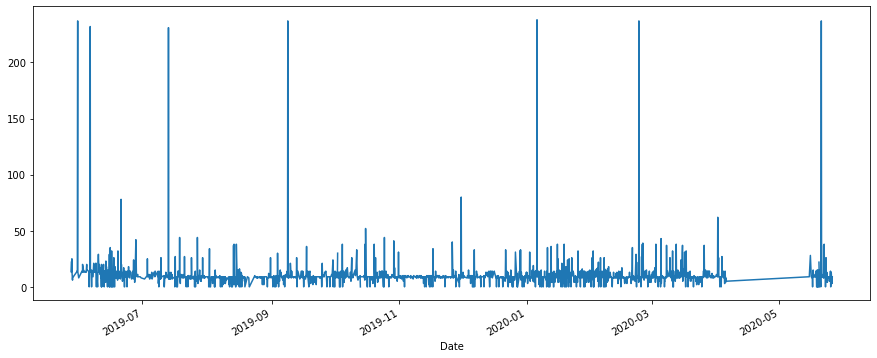


Day Resampled


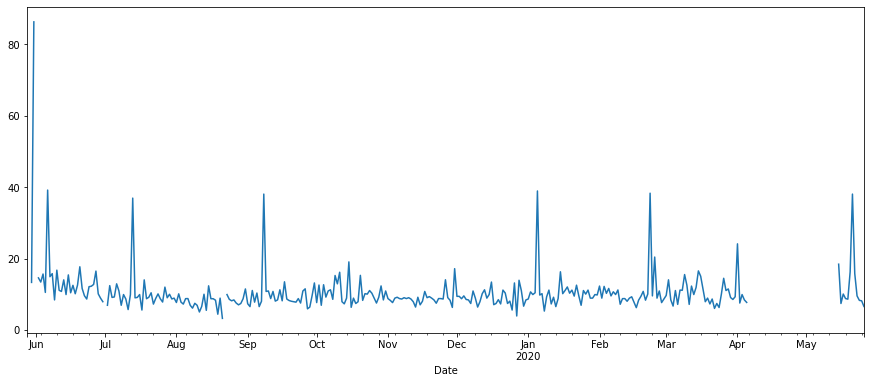

In [11]:
"""
Float and Int Data Type column
"""

col = 'TubingMovement'
print("Initial Analysis for column: {}".format(col))
series = data.set_index('Date').loc[:,col]  # Get it as a series

print(series.describe())

print("\nPlot")
series.plot(figsize=(15, 6))
plt.show()

print("\nDay Resampled")
series.resample('D').mean().plot(figsize=(15, 6))
plt.show()

# Resampling and Filling it up wiht limits
# series.resample('1H').mean().ffill(limit=4).plot(figsize=(15,6))

In [48]:
import statsmodels.api as sm

In [80]:
# Using a 12H Freq
# Forward Filled with a Limit of 1
y = series.resample('12H').mean().ffill()
y.isnull().sum(axis=0)

0

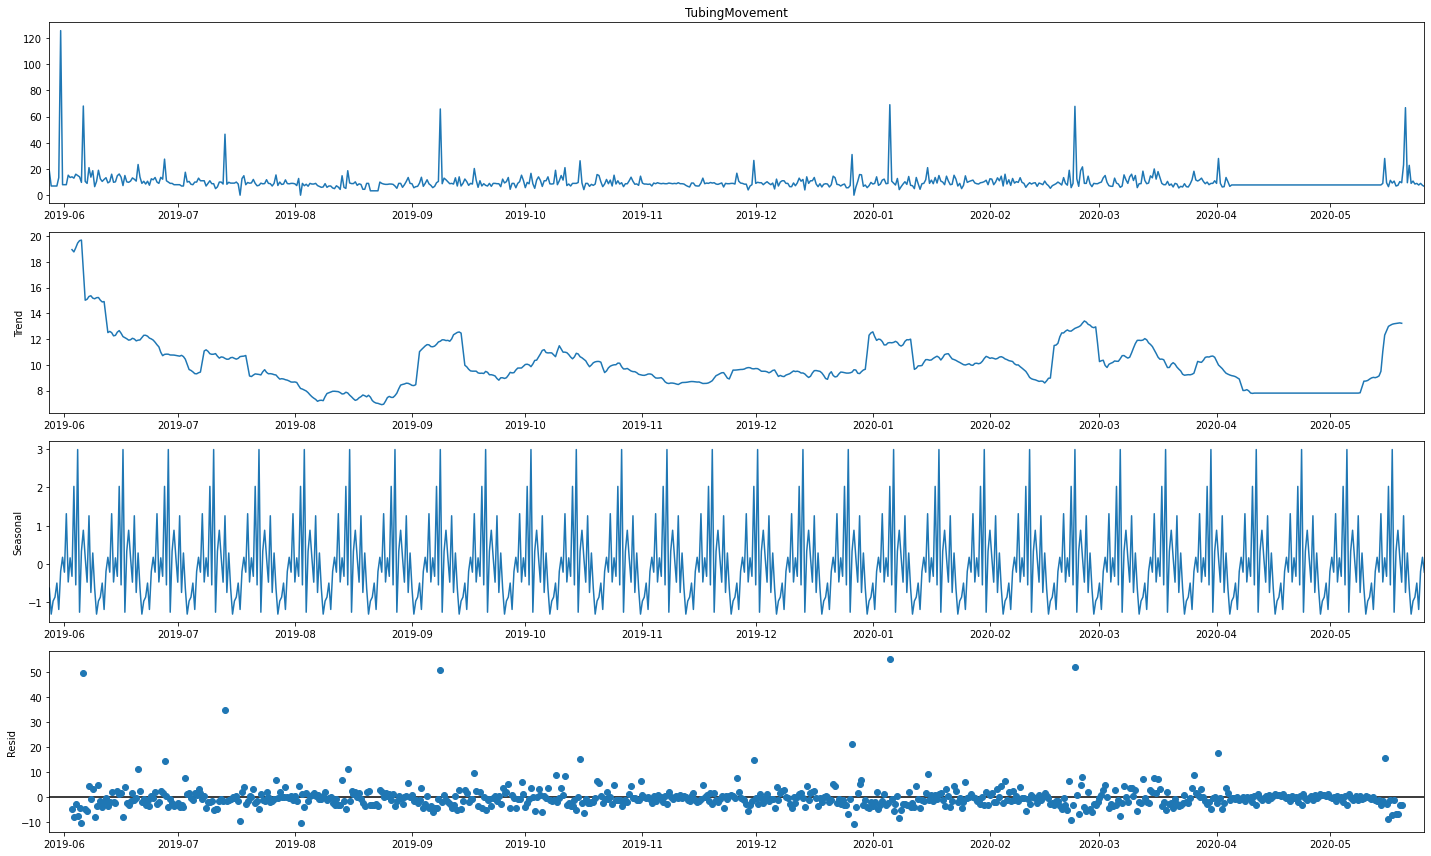

In [81]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 12

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

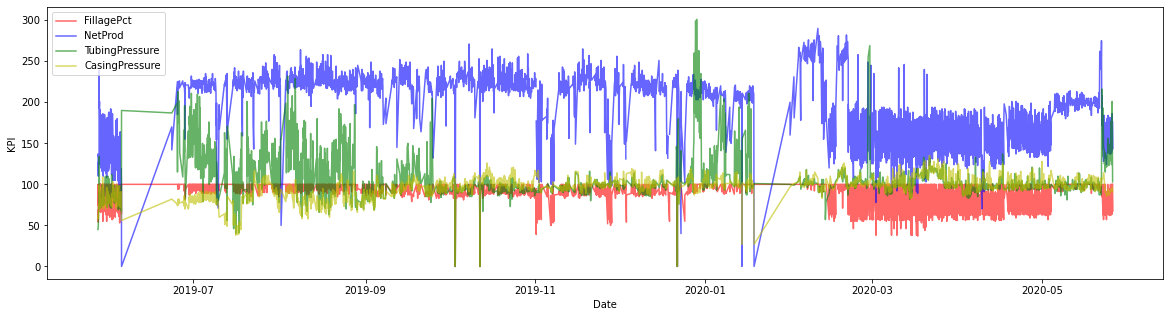

In [25]:
# PLot Kpis
# Col dict is the column name and the color
# Add or subtract columns if need be
col_dict = {
    'FillagePct': 'r',
    'NetProd': 'b',
    'TubingPressure': 'g',
    'CasingPressure': 'y'
}

# Plotting
fig, ax = plt.subplots(figsize=(20,5))
for col, c in col_dict.items():
    ax.plot(well_data.Date, well_data.loc[:, col], color=c, label=col, alpha=0.6)

ax.set_xlabel("Date")
ax.set_ylabel("KPI")
ax.legend(loc='best')
plt.show()

## Query a list of wells

In [27]:
%%time
# Add wells to the list
well_list = [
    'ACADIA 31-25H',
    'Zutz 44-12T',
    'A. JOHNSON 12-1H'
]

query = """
SELECT
"NodeID", "Date", "FillagePct", "NetProd", 
"TubingPressure", "CasingPressure"    -- Add Columns
FROM xspoc_dbo."tblXDiagResults"
WHERE "NodeID" in {}
ORDER BY "NodeID", "Date"
""".format(tuple(well_list))

with PostgresRDS(db='oasis-data') as engine:
    data = run_query(query, engine)

display(data.head())

Connected to oasis-data DataBase
Connection Closed


,NodeID,Date,FillagePct,NetProd,TubingPressure,CasingPressure
0,ACADIA 31-25H,2019-05-27 23:33:12,100,103.0,90,95
1,ACADIA 31-25H,2019-05-28 01:33:33,100,102.0,90,95
2,ACADIA 31-25H,2019-05-28 03:34:43,100,103.0,90,95
3,ACADIA 31-25H,2019-05-28 05:34:50,100,102.0,90,95
4,ACADIA 31-25H,2019-05-28 07:35:18,100,100.0,90,95


Wall time: 15.1 s


In [29]:
data.NodeID.unique()

array(['ACADIA 31-25H', 'A. JOHNSON 12-1H', 'Zutz 44-12T'], dtype=object)